# mplfinanceを使う
[mplfinance](https://github.com/matplotlib/mplfinance)とはファイナンスデータを可視化するためのmatplotlibの拡張です。今回はこれを使って、金融データからグラフを作ってみようと思います。基本的な使い方は [mplfinanceのリポジトリの『Tutorial』](https://github.com/matplotlib/mplfinance#tutorials) にて説明されています。

<iframe width="560" height="315" src="https://www.youtube.com/embed/Z_3CmggMqCY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## データの読み込み
```{hint}
[Pandas-datareader | Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install japanize_matplotlib
    !pip install mplfinance
    !pip install pandas_datareader

In [2]:
import os
import time
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader._utils import RemoteDataError

In [3]:
def get_finance_data(
    ticker_symbol: str, start="2021-01-01", end="2021-06-30", savedir="data"
) -> pd.DataFrame:
    """株価を記録したデータを取得します

    Args:
        ticker_symbol (str): Description of param1
        start (str): 期間はじめの日付, optional.
        end (str): 期間終わりの日付, optional.

    Returns:
        res: 株価データ

    """
    res = None
    filepath = os.path.join(savedir, f"{ticker_symbol}_{start}_{end}_historical.csv")
    os.makedirs(savedir, exist_ok=True)

    if not os.path.exists(filepath):
        try:
            time.sleep(5.0)
            res = web.DataReader(ticker_symbol, "yahoo", start=start, end=end)
            res.to_csv(filepath, encoding="utf-8-sig")
        except (RemoteDataError, KeyError):
            print(f"ticker_symbol ${ticker_symbol} が正しいか確認してください。")
    else:
        res = pd.read_csv(filepath, index_col="Date")
        res.index = pd.to_datetime(res.index)

    assert res is not None, "データ取得に失敗しました"
    return res

In [4]:
# 銘柄名、期間、保存先ファイル
ticker_symbol = "NVDA"
start = "2021-01-01"
end = "2021-06-30"

# データを取得する
df = get_finance_data(ticker_symbol, start=start, end=end, savedir="../data")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,131.509995,129.149994,131.365005,130.550003,19242400.0,130.413864
2021-01-04,136.524994,129.625000,131.042496,131.134995,56064000.0,130.998245
2021-01-05,134.434998,130.869995,130.997498,134.047501,32276000.0,133.907700
2021-01-06,132.449997,125.860001,132.225006,126.144997,58042400.0,126.013443
2021-01-07,133.777496,128.865005,129.675003,133.440002,46148000.0,133.300842


## OHLCをプロット
OHLCとは始値・高値・安値・終値のことで、普段最もよくみるグラフの一つです。
ローソク足と、線でのプロットをしてみます。

```{hint}
[mplfinance | matplotlib utilities for the visualization, and visual analysis, of financial data](https://github.com/matplotlib/mplfinance)
```

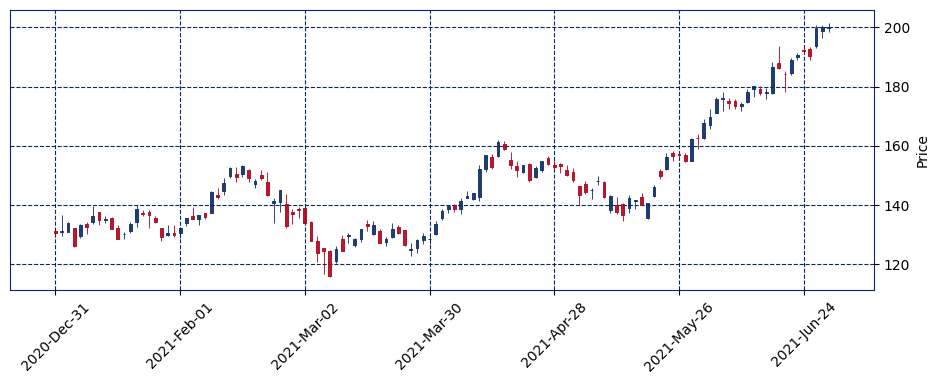

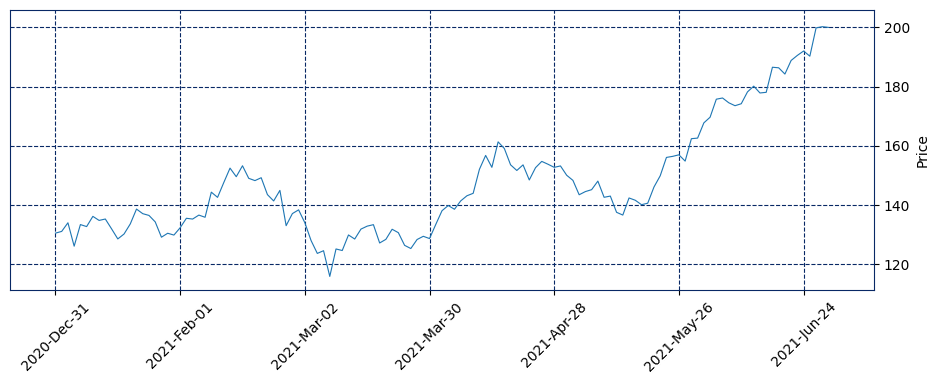

In [5]:
import mplfinance as mpf

mpf.plot(df, type="candle", style="starsandstripes", figsize=(12, 4))
mpf.plot(df, type="line", style="starsandstripes", figsize=(12, 4))

## 移動平均線
株価や外国為替のテクニカル分析において使用される指標の一つに、移動平均線というものがあります。

> 現在のテクニカル分析では、短期、中期、長期の3本の移動平均線を同時に表示させる例が多く、日足チャートでは、5日移動平均線、25日移動平均線、75日移動平均線がよく使われる。（引用元：[Wikipedia 移動平均線](https://ja.wikipedia.org/wiki/%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87%E7%B7%9A)）

5/25/75日移動平均線をプロットするために `mav` オプションを指定します。

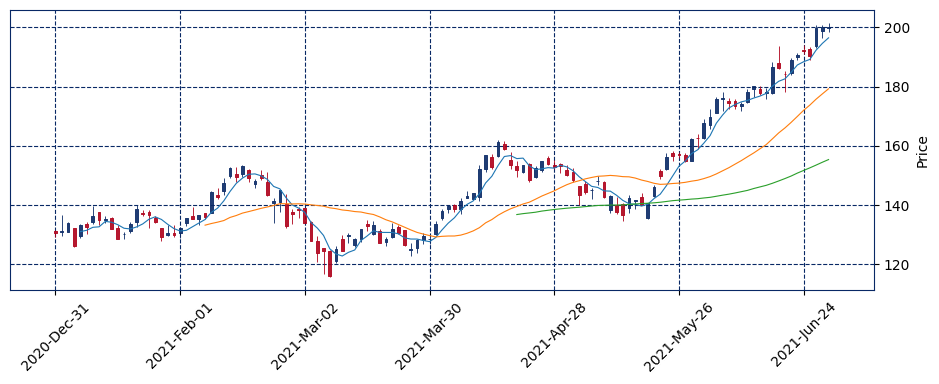

In [6]:
mpf.plot(df, type="candle", style="starsandstripes", figsize=(12, 4), mav=[5, 25, 75])

## 凡例の表示
どの線が何日移動平均線かわかりにくいので、凡例を追加します。
```{hint}
[matplotlib.pyplot.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
```

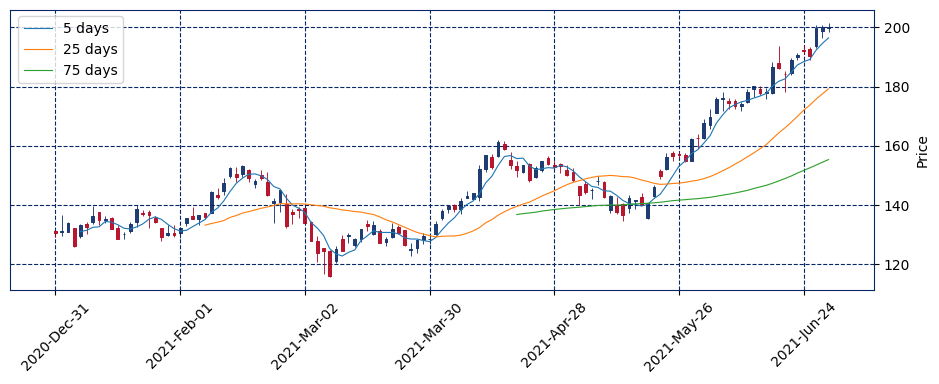

In [7]:
import japanize_matplotlib
import matplotlib.patches as mpatches

fig, axes = mpf.plot(
    df,
    type="candle",
    style="starsandstripes",
    figsize=(12, 4),
    mav=[5, 25, 75],
    returnfig=True,
)
fig.legend(
    [f"{days} days" for days in [5, 25, 75]], bbox_to_anchor=(0.0, 0.78, 0.28, 0.102)
)

## ボリュームの表示

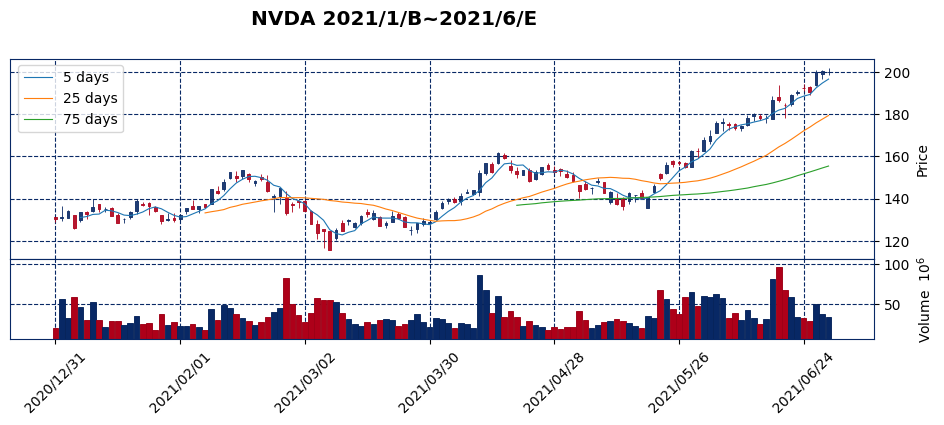

In [8]:
fig, axes = mpf.plot(
    df,
    title="NVDA 2021/1/B~2021/6/E",
    type="candle",
    style="starsandstripes",
    figsize=(12, 4),
    mav=[5, 25, 75],
    volume=True,
    datetime_format="%Y/%m/%d",
    returnfig=True,
)
fig.legend(
    [f"{days} days" for days in [5, 25, 75]], bbox_to_anchor=(0.0, 0.78, 0.28, 0.102)
)

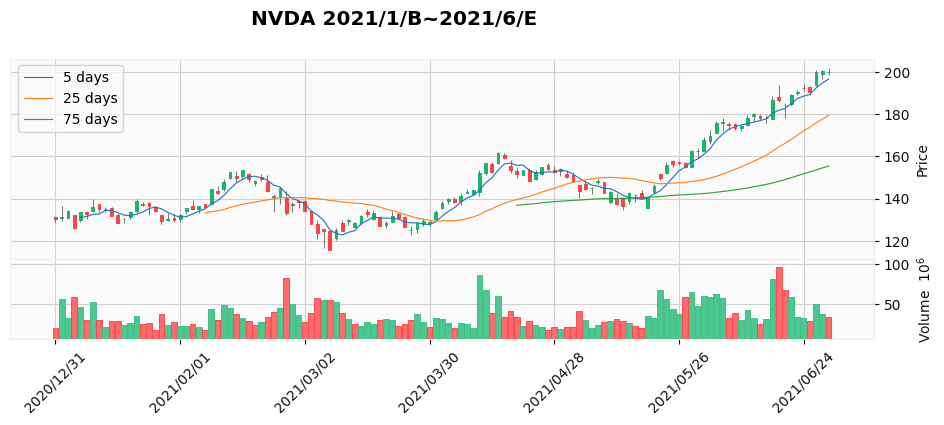

In [9]:
fig, axes = mpf.plot(
    df,
    title="NVDA 2021/1/B~2021/6/E",
    type="candle",
    style="yahoo",
    figsize=(12, 4),
    mav=[5, 25, 75],
    volume=True,
    datetime_format="%Y/%m/%d",
    returnfig=True,
)
fig.legend(
    [f"{days} days" for days in [5, 25, 75]], bbox_to_anchor=(0.0, 0.78, 0.28, 0.102)
)